<a href="https://colab.research.google.com/github/RobSpiewakowski/Public_repository/blob/main/ML_Regression_Model_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this task, we are going to create a neural network, to predict the fuel efficiency of late 1970-s and early 1980-s cars. We have dataset including attributes like: cylinders, displacement, horsepower and weight of cars.

# 1. Import modules and load datasets:

In [47]:
# Modules:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print(tf.__version__)

2.5.0


In [62]:
# Load dataset:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin']

raw_data = pd.read_csv(URL, names = column_names, na_values = '?', comment = '\t', sep = ' ', skipinitialspace = True)
raw_data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


# 2. Data pre-processing:

In [63]:
# Looking for lack of data:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [64]:
# We have 6 observations wih no 'Horsepower' value. Let's drop them:
raw_data = raw_data.dropna()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [51]:
# Simple analysis:
# Horsepower and MPG in relation to weight:
plot1 = px.scatter_3d(raw_data,
                      x = 'Weight',
                      y = 'Horsepower',
                      z = 'MPG',
                      color = 'Model year',
                      title = 'Horsepower and MPG in relation to car\'s weight')
plot1.show()

In [65]:
# Categories of 'Origin':
raw_data['Origin'] = raw_data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
raw_data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA


In [53]:
# Distribution of Horsepower:
plot2 = px.box(raw_data, y = 'Horsepower', color = 'Origin', points = 'all')
plot2.show()

In [54]:
# Distribution of MPG:
plot3 = px.box(raw_data, y = 'MPG', color = 'Origin', points = 'all')
plot3.show()

In [55]:
# Distribution of Weight:
plot2 = px.box(raw_data, y = 'Weight', color = 'Origin', points = 'all')
plot2.show()

In [56]:
# Distribution of Displacement:
plot2 = px.box(raw_data, y = 'Displacement', color = 'Origin', points = 'all')
plot2.show()

In [57]:
# Distribution of Acceleration:
plot2 = px.box(raw_data, y = 'Acceleration', color = 'Origin', points = 'all')
plot2.show()

In [66]:
# Get_dummies on 'Origin':
raw_data = pd.get_dummies(raw_data, columns = ['Origin'], prefix_sep = ': ')
raw_data.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin: Europe,Origin: Japan,Origin: USA
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,0,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,0,0,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,0,1,0
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


IQR to identify outliers:

In [67]:
def IQR_outliers(a, b, c):
  Q1, Q3 = np.percentile(a, [b, c])
  IQR = Q3 - Q1

  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  print('Upper limit = ', round(upper_limit, 3), '\n', 'Lower limit = ', round(lower_limit, 3))

  indexes = np.where((a > upper_limit) | (a < lower_limit))
  b = np.full(shape = a.shape[0], fill_value = 1)
  b[indexes] = -1

  return b

In [68]:
# Create a for-loop, to identify and drop all outstanding values in all the numerical variables:
num_variables = ['MPG',	'Displacement',	'Horsepower',	'Weight',	'Acceleration']

for i in range(len(num_variables)):
  raw_data['IQR'] = IQR_outliers(raw_data[num_variables[i]], 25, 75)

  plot = px.scatter(raw_data, y = num_variables[i], color = 'IQR')
  plot.show()

  raw_data = raw_data[raw_data['IQR'] != -1]
  print(raw_data.shape[0])

raw_data = raw_data.drop(columns = 'IQR')

Upper limit =  47.0 
 Lower limit =  -1.0


392
Upper limit =  531.875 
 Lower limit =  -151.125


392
Upper limit =  202.5 
 Lower limit =  -1.5


382
Upper limit =  5504.375 
 Lower limit =  249.375


382
Upper limit =  22.0 
 Lower limit =  9.2


373


In [69]:
# Correlation between variables:
raw_data.corr().style.background_gradient(cmap = 'RdYlGn_r')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin: Europe,Origin: Japan,Origin: USA
MPG,1.000000,-0.771247,-0.805049,-0.790232,-0.832193,0.367520,0.551928,0.211418,0.463551,-0.553479
Cylinders,-0.771247,1.000000,0.955926,0.857821,0.896378,-0.475904,-0.304672,-0.336764,-0.405498,0.601890
Displacement,-0.805049,0.955926,1.000000,0.888220,0.938802,-0.489583,-0.315273,-0.364533,-0.452750,0.663131
Horsepower,-0.790232,0.857821,0.888220,1.000000,0.881265,-0.648925,-0.354412,-0.267862,-0.339720,0.493186
Weight,-0.832193,0.896378,0.938802,0.881265,1.000000,-0.376125,-0.268195,-0.282882,-0.453490,0.600438
Acceleration,0.367520,-0.475904,-0.489583,-0.648925,-0.376125,1.000000,0.223429,0.145117,0.130517,-0.222205
Model year,0.551928,-0.304672,-0.315273,-0.354412,-0.268195,0.223429,1.000000,-0.074741,0.190965,-0.102520
Origin: Europe,0.211418,-0.336764,-0.364533,-0.267862,-0.282882,0.145117,-0.074741,1.000000,-0.235912,-0.577174
Origin: Japan,0.463551,-0.405498,-0.452750,-0.339720,-0.453490,0.130517,0.190965,-0.235912,1.000000,-0.657409
Origin: USA,-0.553479,0.601890,0.663131,0.493186,0.600438,-0.222205,-0.102520,-0.577174,-0.657409,1.000000


In [70]:
# As we can see, there is very strong correlation between a couple of variables (over 95 %). So we can identify strong-related variables and drop one of them:
matrix_filter = np.triu(np.ones(raw_data.corr().abs().shape), k = 1).astype(np.bool)

up = raw_data.corr().abs().where(matrix_filter)

index_strong_corr = [col for col in up.columns if any(up[col] > 0.95)]
print(index_strong_corr)

['Displacement']


In [72]:
# Let's drop 'Displacement' variable:
raw_data = raw_data.drop(columns = 'Displacement')
raw_data.tail(10)

,MPG,Cylinders,Horsepower,Weight,Acceleration,Model year,Origin: Europe,Origin: Japan,Origin: USA
387,38.0,6,85.0,3015.0,17.0,82,0,0,1
388,26.0,4,92.0,2585.0,14.5,82,0,0,1
389,22.0,6,112.0,2835.0,14.7,82,0,0,1
390,32.0,4,96.0,2665.0,13.9,82,0,1,0
391,36.0,4,84.0,2370.0,13.0,82,0,0,1
392,27.0,4,90.0,2950.0,17.3,82,0,0,1
393,27.0,4,86.0,2790.0,15.6,82,0,0,1
395,32.0,4,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,82.0,2720.0,19.4,82,0,0,1


# Build a neural network (ML model):

MPG is the function of other variables. So model will predict it.

In [73]:
# Train/test split:
train_data = raw_data.sample(frac = 0.8, random_state = 0)    # Train data is 80 % of all, randomly selected.
test_data = raw_data.drop(train_data.index)                   # Test data is all other data

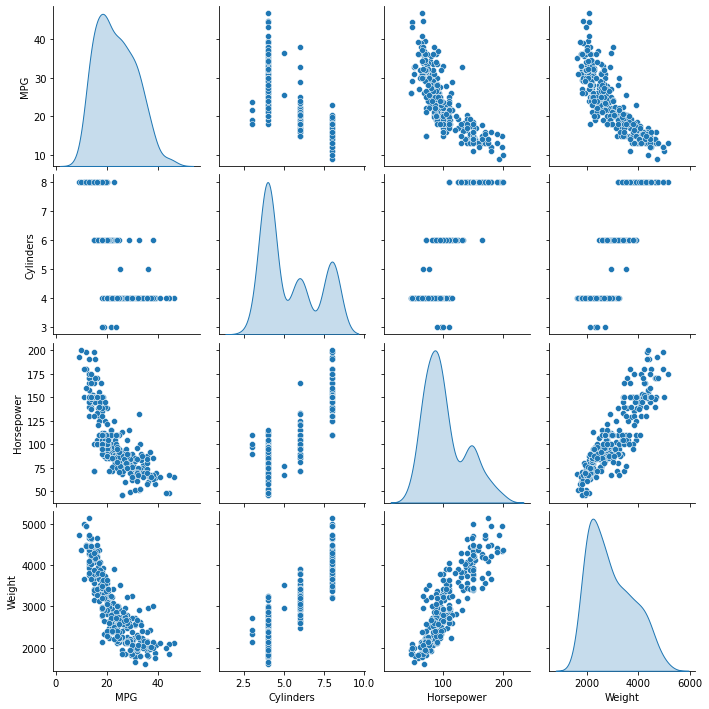

In [74]:
# One more time - inspect train data:
sns.pairplot(train_data[['MPG', 'Cylinders', 'Horsepower', 'Weight']], diag_kind = 'kde')

In [75]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,298.0,23.646644,7.673353,9.0,17.525,23.0,29.375,46.6
Cylinders,298.0,5.402685,1.709232,3.0,4.000,4.0,8.000,8.0
Horsepower,298.0,102.597315,34.815032,46.0,75.000,92.0,125.000,200.0
Weight,298.0,2939.701342,845.899574,1613.0,2212.250,2730.0,3568.250,5140.0
Acceleration,298.0,15.493624,2.468275,9.5,13.725,15.5,17.000,21.8
Model year,298.0,76.003356,3.611148,70.0,73.000,76.0,79.000,82.0
Origin: Europe,298.0,0.174497,0.380174,0.0,0.000,0.0,0.000,1.0
Origin: Japan,298.0,0.214765,0.411350,0.0,0.000,0.0,0.000,1.0
Origin: USA,298.0,0.610738,0.488403,0.0,0.000,1.0,1.000,1.0


In [79]:
# Train/test split - spliting variables:
X_train = train_data.drop(columns = 'MPG')
y_train = train_data['MPG']

X_test = test_data.drop(columns = 'MPG')
y_test = test_data['MPG']

print('X_train:', X_train.shape, '\n', 'y_train:', y_train.shape, '\n', 'X_test:', X_test.shape, '\n', 'y_test:', y_test.shape)

X_train: (298, 8) 
 y_train: (298,) 
 X_test: (75, 8) 
 y_test: (75,)


In [88]:
# First layer of neural network: normalization of describing variables:
normalizer = preprocessing.Normalization(axis = -1)

normalizer.adapt(np.array(X_train))
normalizer.adapt(np.array(X_test))

print(normalizer.mean.numpy())

[5.4266672e+00 9.8840004e+01 2.9656533e+03 1.5840000e+01 7.6533333e+01
 1.6000001e-01 2.0000000e-01 6.3999999e-01]


1. Start with a single variable to build a linear-regression model:

Our first step is to biuld a linear-regression model based on one variable: 'Horsepower'.

In [90]:
# Select variable:
hp = np.array(train_data['Horsepower'])

# Normalize data:
hp_norm = preprocessing.Normalization(input_shape = [1,], axis = None)
hp_norm.adapt(hp)

# Build the sequential model:
hp_linear = tf.keras.Sequential([hp_norm, layers.Dense(units = 1)])

hp_linear.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [93]:
# Prediction on this model:
hp_linear.predict(hp[:5])

array([[-0.15791184],
       [ 0.2462996 ],
       [ 0.22279893],
       [-0.03570838],
       [-0.03570838]], dtype=float32)

In [94]:
# Compile the model:
hp_linear.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1), loss = 'mean_absolute_error')

In [95]:
# Train the model:
%%time
history = hp_linear.fit(train_data['Horsepower'],
                        train_data['MPG'],
                        epochs = 100,
                        verbose = 0,
                        validation_split = 0.2)

CPU times: user 2.95 s, sys: 125 ms, total: 3.07 s
Wall time: 3.04 s


In [96]:
# Visualize the model's training process:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,23.125278,23.722738,0
1,22.305729,22.928869,1
2,21.500074,22.159119,2
3,20.694353,21.389919,3
4,19.887005,20.594576,4
...,...,...,...
95,3.502380,3.527295,95
96,3.498669,3.495393,96
97,3.504354,3.486020,97
98,3.498855,3.503210,98


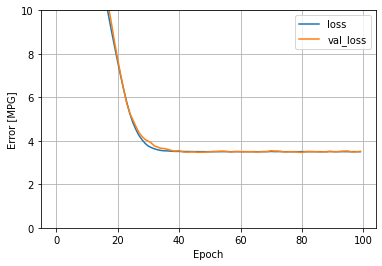

In [97]:
# Present val_loss on plot:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [98]:
# Collect results for later:
test_results = {}
test_results['Hp_linear'] = hp_linear.evaluate(test_data['Horsepower'], test_data['MPG'], verbose = 0)

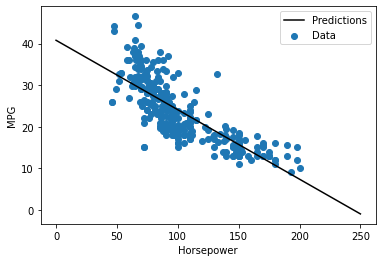

In [101]:
# Prediction on plot:
x = tf.linspace(0.0, 250, 251)
y = hp_linear.predict(x)

plt.scatter(train_data['Horsepower'], train_data['MPG'], label = 'Data')
plt.plot(x, y, color = 'k', label = 'Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

2. Build a model with multiple inputs (all variables)

In [104]:
# Normalization of all variables:
linear_model = tf.keras.Sequential([normalizer, layers.Dense(units = 1)])

linear_model.predict(X_train[:5])

array([[-0.876649  ],
       [ 2.290421  ],
       [ 2.305679  ],
       [ 0.24897093],
       [ 0.15968932]], dtype=float32)

In [105]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[ 0.3123827 ],
       [ 0.7185619 ],
       [-0.31113452],
       [-0.3816471 ],
       [ 0.1001637 ],
       [-0.81190693],
       [ 0.324535  ],
       [ 0.6436112 ]], dtype=float32)>

In [106]:
# Compile the model:
linear_model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1),
                     loss = 'mean_absolute_error')

In [107]:
# Learning model:
%%time
history = linear_model.fit(X_train, y_train, epochs = 100, verbose = 0, validation_split = 0.2)

CPU times: user 2.9 s, sys: 143 ms, total: 3.04 s
Wall time: 2.83 s


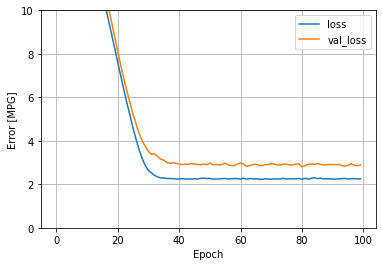

In [108]:
# Present val_loss on plot:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [109]:
# Collect the results for later:
test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose = 0)

3. DNN Regression:

This model implements single input and multiple input DNN models. The code is basically the same, except the model is expanded to include some 'hidden' non-linear layers. The name 'hidden' here just means not directly conected to the inputs or outputs.

These models will contain a few more layers thaqn the linear model:

* The normalization layer,
* Two hidden, non-linear, Dense layers using the 'relu' function,
* A linear single-output layer.

Both will use the same training procedure so the compile method is included in the build_and_compile_model function:

In [110]:
# Build adn compile the model function:
def build_and_compile_model(norm):
  model = keras.Sequential([norm,
                            layers.Dense(64, activation = 'relu'),
                            layers.Dense(64, activation = 'relu'),
                            layers.Dense(1)])
  
  model.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

  return model

In [111]:
# Using model with one variable:
dnn_hp_model = build_and_compile_model(hp_norm)
dnn_hp_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [112]:
# Train the DNN model with one variable:
%%time
history = dnn_hp_model.fit(train_data['Horsepower'], train_data['MPG'],
                           validation_split = 0.2,
                           verbose = 0, epochs = 100)

CPU times: user 3.3 s, sys: 162 ms, total: 3.46 s
Wall time: 3.14 s


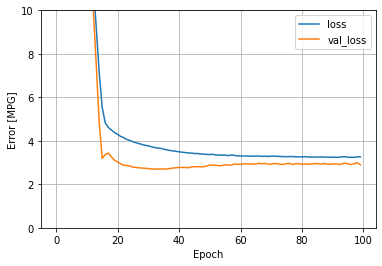

In [113]:
# Plot:
# Present val_loss on plot:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

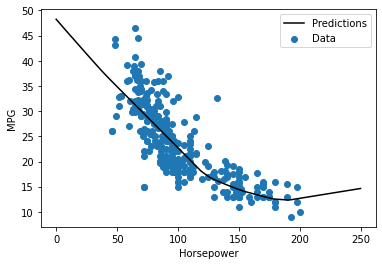

In [114]:
# Present predictions on plot:
x = tf.linspace(0.0, 250, 251)
y = dnn_hp_model.predict(x)

plt.scatter(train_data['Horsepower'], train_data['MPG'], label = 'Data')
plt.plot(x, y, color = 'k', label = 'Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [115]:
# Collect the results for later:
test_results['dnn_hp_model'] = dnn_hp_model.evaluate(test_data['Horsepower'], test_data['MPG'], verbose = 0)

DNN model with all variables - full model:

In [116]:
# Using DNN model with full dataset:
dnn_full = build_and_compile_model(normalizer)
dnn_full.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [117]:
# Training model:
history = dnn_full.fit(X_train, y_train,
                       validation_split = 0.2,
                       verbose = 0, epochs = 100)

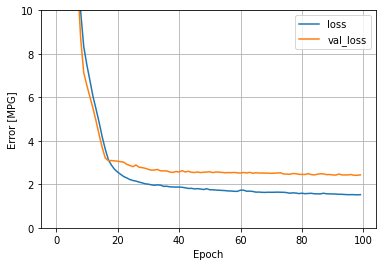

In [118]:
# Plot:
# Present val_loss on plot:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [121]:
# Collecd results:
test_results['dnn_full'] = dnn_full.evaluate(X_test, y_test, verbose = 0)

# Compare all the models:

In [122]:
# compare the mean absolute error values of all the models, we have created and used to predict:
comp = pd.DataFrame(test_results, index = ['Mean absolute error on predicting MPG']).T
comp

,Mean absolute error on predicting MPG
Hp_linear,4.170328
linear_model,2.578376
dnn_hp_model,3.690944
dnn_full,2.120093


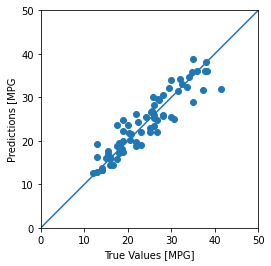

In [124]:
# dnn_full model was the best one to predict MPG values, with tle lowest mean absolute error value.
# Let's make prediction using this model:
test_pred = dnn_full.predict(X_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

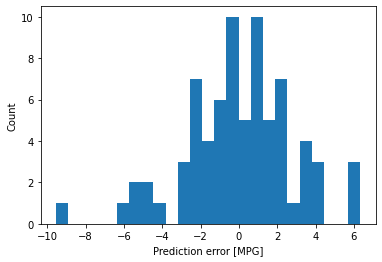

In [125]:
# Present error distribution:
error = test_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction error [MPG]')
_ = plt.ylabel('Count')

In [126]:
# Save model:
dnn_full.save('DNN model')

INFO:tensorflow:Assets written to: DNN model/assets
